In [5]:
#eda of dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data = pd.read_csv('trading.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87780 entries, 0 to 87779
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  87780 non-null  int64  
 1   datadate    87780 non-null  int64  
 2   tic         87780 non-null  object 
 3   adjcp       87780 non-null  float64
 4   open        87780 non-null  float64
 5   high        87780 non-null  float64
 6   low         87780 non-null  float64
 7   volume      87780 non-null  float64
 8   macd        87780 non-null  float64
 9   rsi         87780 non-null  float64
 10  cci         87780 non-null  float64
 11  adx         87780 non-null  float64
 12  turbulence  87780 non-null  float64
dtypes: float64(10), int64(2), object(1)
memory usage: 8.7+ MB


In [33]:
# print column names
print(data.columns)

Index(['Unnamed: 0', 'datadate', 'tic', 'adjcp', 'open', 'high', 'low',
       'volume', 'macd', 'rsi', 'cci', 'adx', 'turbulence'],
      dtype='object')


In [34]:
data['datadate'].sample(5)

72558    20180810
34280    20130718
47674    20150428
84851    20200330
57389    20160808
Name: datadate, dtype: int64

In [35]:
# If your 'date' column is a string or integer in the format YYYYMMDD, do:
data['date'] = pd.to_datetime(data['datadate'].astype(str), format='%Y%m%d')

print(data['date'].head())


0   2009-01-02
1   2009-01-02
2   2009-01-02
3   2009-01-02
4   2009-01-02
Name: date, dtype: datetime64[ns]


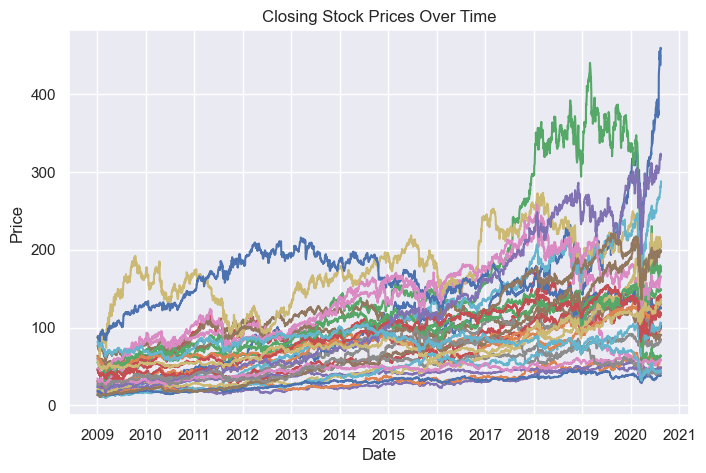

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Ensure 'date' column is in datetime format before plotting
# data['date'] = pd.to_datetime(data['date'])  # Uncomment if needed

sns.set()
plt.figure(figsize=(8, 5))

for ticker in data['tic'].unique():
    data_ticker = data[data['tic'] == ticker]
    plt.plot(data_ticker['date'], data_ticker['adjcp'], label=ticker)

plt.title('Closing Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')

# Set the x-axis major ticks to be at each year
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())           # major ticks every year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))   # format tick labels as YYYY

plt.show()


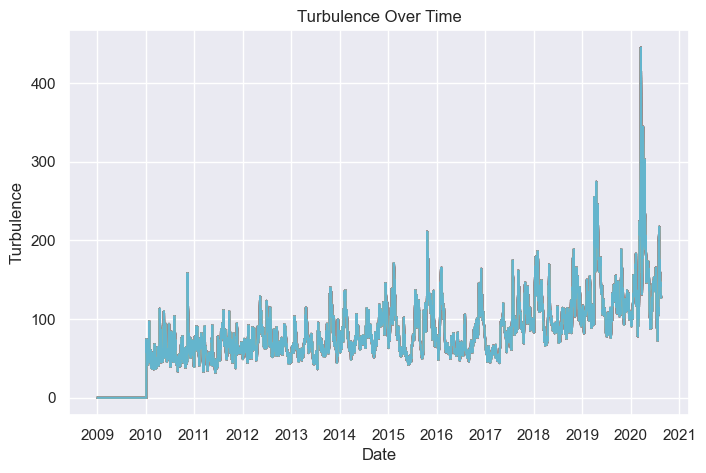

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Ensure 'date' column is in datetime format before plotting
# data['date'] = pd.to_datetime(data['date'])  # Uncomment if needed

sns.set()
plt.figure(figsize=(8, 5))

for ticker in data['tic'].unique():
    data_ticker = data[data['tic'] == ticker]
    plt.plot(data_ticker['date'], data_ticker['turbulence'], label=ticker)

plt.title('Turbulence Over Time')
plt.xlabel('Date')
plt.ylabel('Turbulence')

# Set the x-axis major ticks to be at each year
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())           # major ticks every year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))   # format tick labels as YYYY

plt.show()


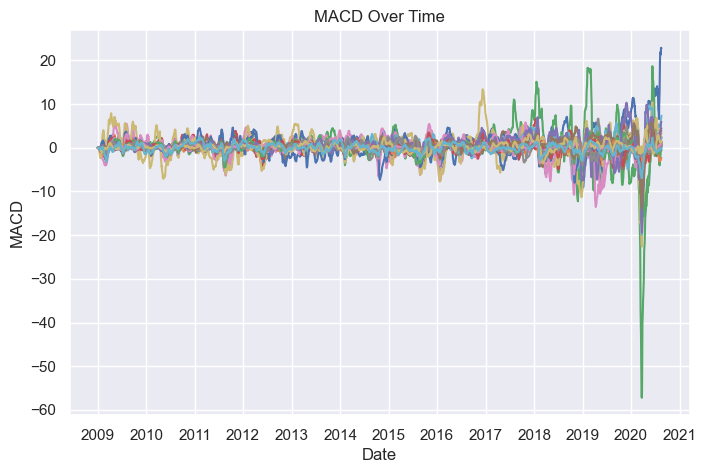

In [37]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Ensure 'date' column is in datetime format before plotting
# data['date'] = pd.to_datetime(data['date'])  # Uncomment if needed

sns.set()
plt.figure(figsize=(8, 5))

for ticker in data['tic'].unique():
    data_ticker = data[data['tic'] == ticker]
    plt.plot(data_ticker['date'], data_ticker['macd'], label=ticker)

plt.title('MACD Over Time')
plt.xlabel('Date')
plt.ylabel('MACD')

# Set the x-axis major ticks to be at each year
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())           # major ticks every year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))   # format tick labels as YYYY
#put legend outside of the plot

plt.show()


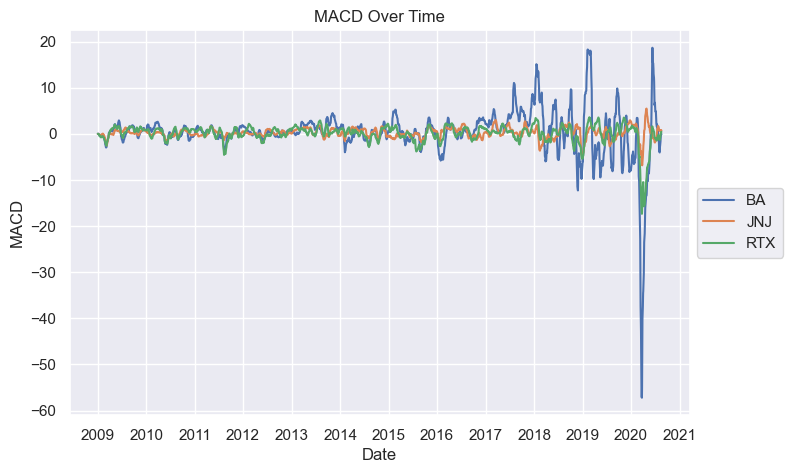

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Ensure 'date' column is in datetime format before plotting
# data['date'] = pd.to_datetime(data['date'])  # Uncomment if needed

sns.set()
plt.figure(figsize=(8, 5))

# filter data to tickers: BA, JNJ, RTX
for ticker in data['tic'].unique():
    data_ticker = data[data['tic'] == ticker]
    plt.plot(data_ticker['date'], data_ticker['macd'], label=ticker)

plt.title('MACD Over Time')
plt.xlabel('Date')
plt.ylabel('MACD')

# Set the x-axis major ticks to be at each year
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())           # major ticks every year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))   # format tick labels as YYYY
#put legend outside of the plot

plt.show()


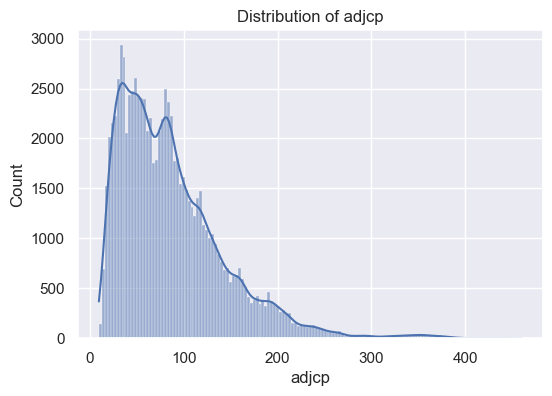

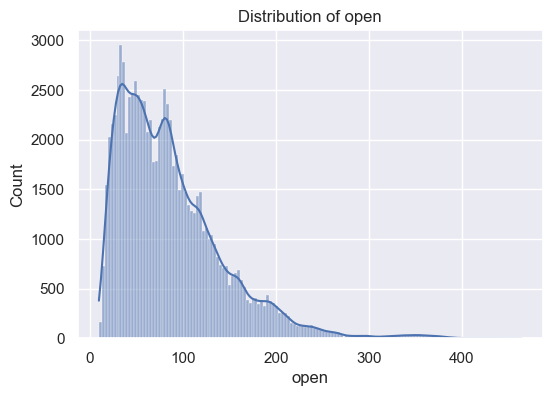

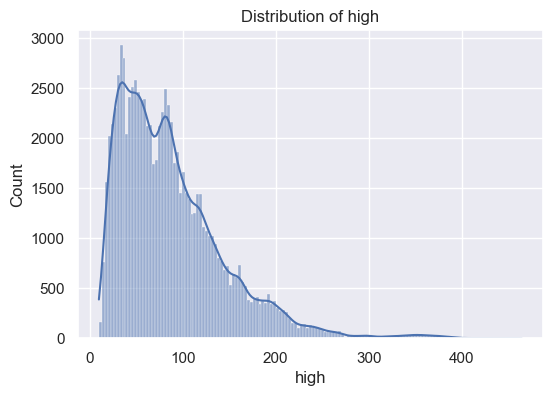

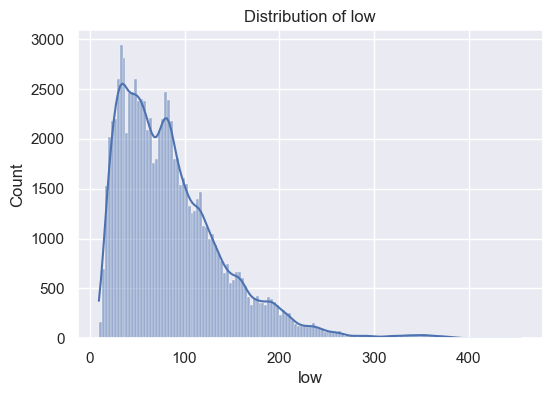

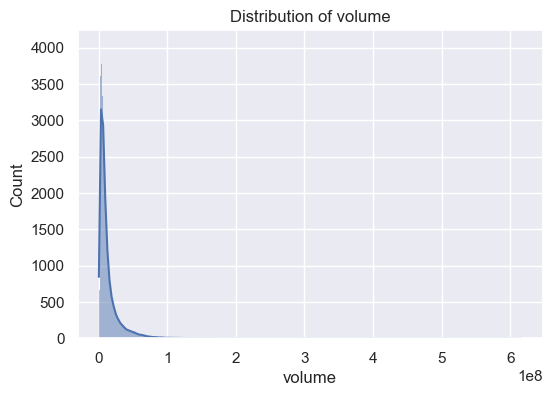

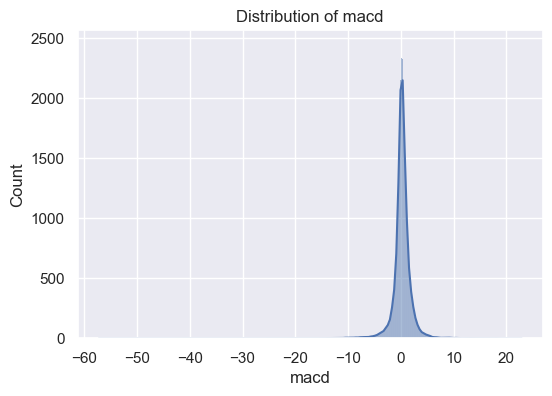

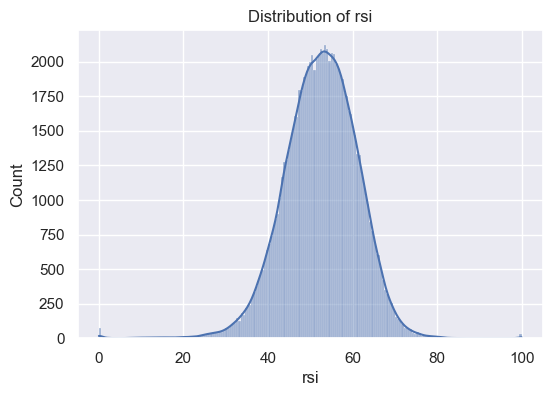

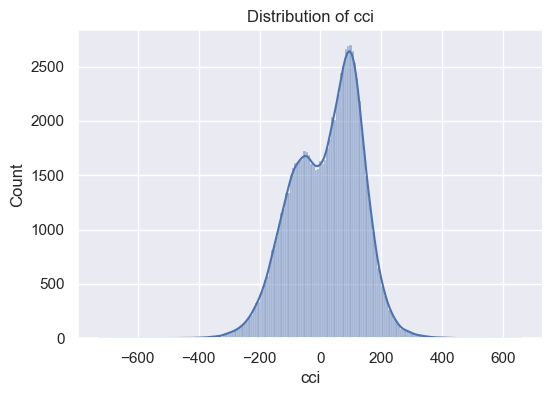

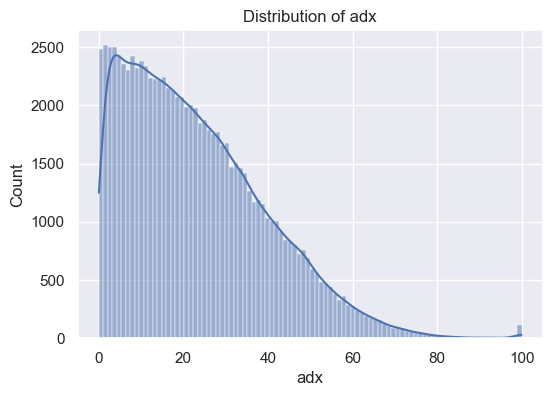

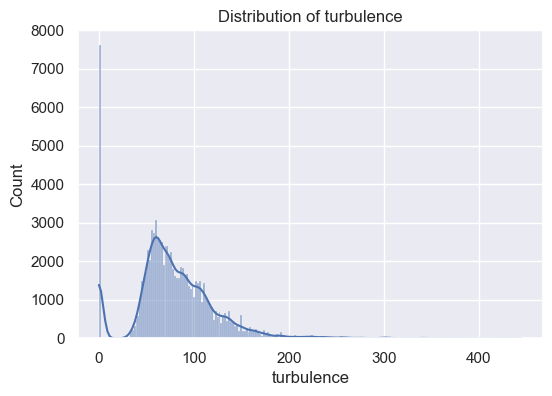

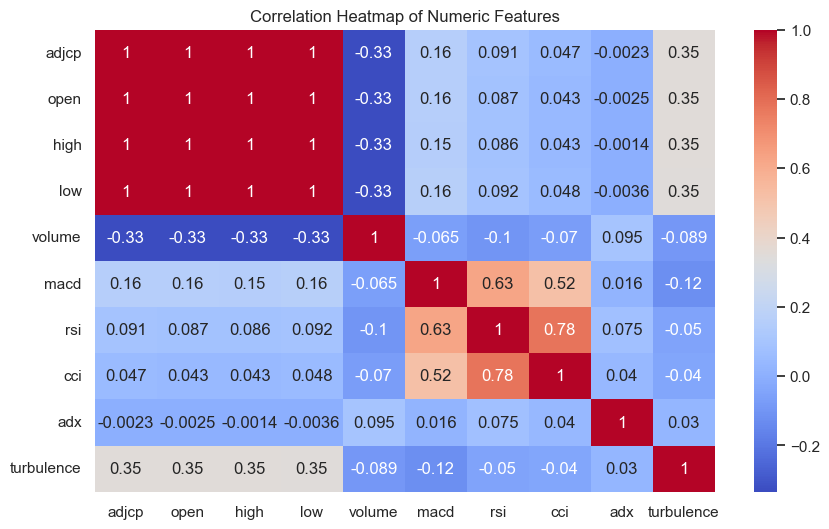

In [12]:
numeric_cols = ['adjcp', 'open', 'high', 'low', 
                'volume', 'macd', 'rsi', 'cci', 'adx', 'turbulence']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=data, x=col, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# 7. Correlation heatmap for numeric columns
plt.figure(figsize=(10, 6))
corr = data[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

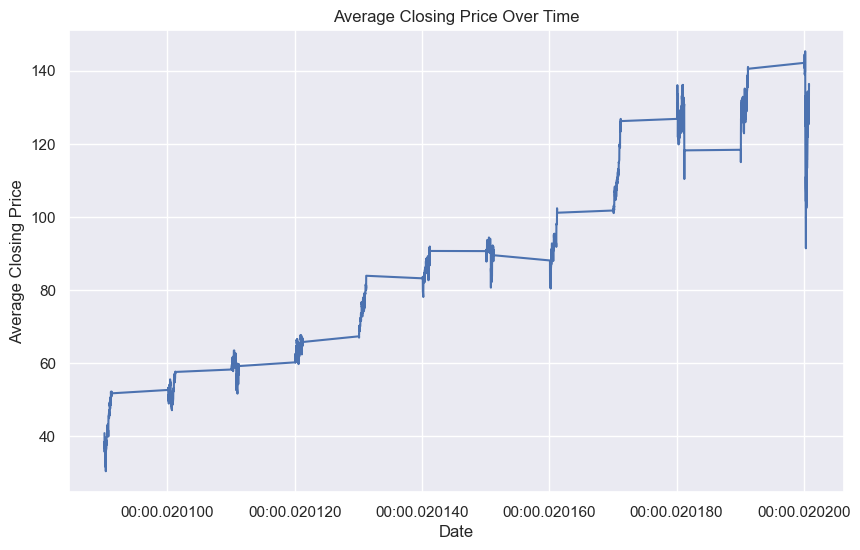

In [9]:
# plot average closing price for each day over time
# group by date and calculate average closing price
df = data.groupby('date')['adjcp'].mean().reset_index()
df.columns = ['date', 'avg_price']
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# plot average closing price for each day over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y='avg_price')
plt.title('Average Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Closing Price')
plt.show()

KeyboardInterrupt: 

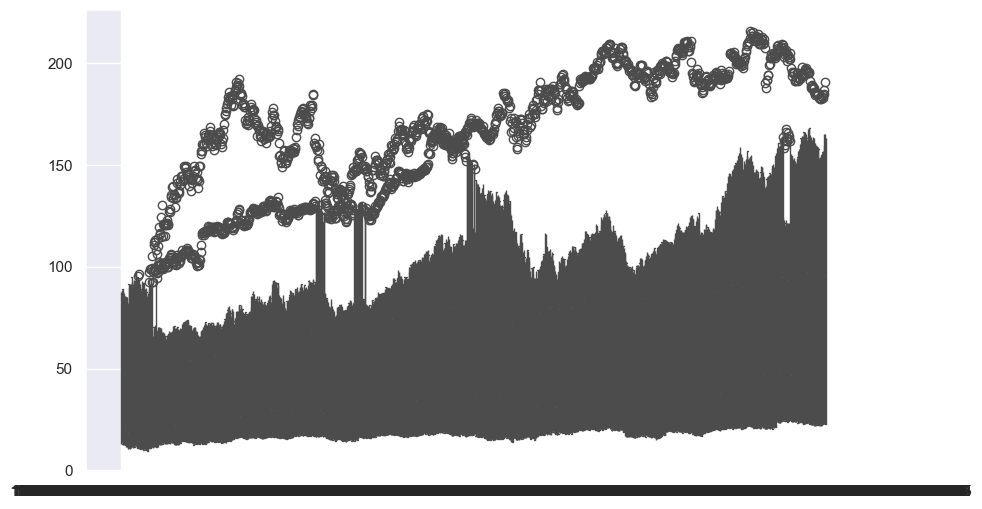

In [7]:
# box plots to detect outliers

# box plot for 'adjcp'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='date', y='adjcp')
plt.title('Box Plot of Closing Prices by Ticker')
plt.show()